In [41]:
"""
MIT License

Copyright (c) [2024] [HARI GOLFIANTO]

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
"""

###################################################
# ACCELERATION/DECELERATION AS FUNCTION OF SPEED
###################################################
def acc(speed):
  m = -3/65
  a = np.where(speed <= 35, 3.4, m*speed + 5)
  # convert to m/s2

  return a*0.27778
  # return 0.56
def decel(speed):
  if speed <= 20:
    a = -0.43
  elif speed > 20:
    a = -0.78
  #   a = -0.56
    # already in m/s2
  return -0.56

###################################################
# OPERATION MODE
###################################################
def acceleration():
  a[i] = acc(v[i-1])
  v[i] = v[i-1] + a[i] * dt
  s[i] = s[i-1] + v[i-1] * dt + 0.5*a[i] * dt**2
def cruising():
  a[i] = 0
  v[i] = v[i-1] + a[i] * dt
  s[i] = s[i-1] + v[i-1] * dt + 0.5*a[i] * dt**2
def braking():
  a[i] = decel(v[i-1])
  v[i] = v[i-1] + a[i] * dt
  s[i] = s[i-1] + v[i-1] * dt + 0.5*a[i] * dt**2
def braking_backward():
  a_b[i] = decel(v[i-1])
  v_b[i] = v_b[i-1] - a_b[i] * dt
  s_b[i] = s_b[i-1] - v_b[i-1] * dt - 0.5*a_b[i] * dt**2

###################################################
# OTHERS
###################################################
def process_list_with_indices(list):
    # Create a list of tuples with values and their original indices
    indexed_list = [(value, index) for index, value in enumerate(list)]

    i = 1
    while i < len(indexed_list):
        # Check if the current value is smaller than the previous value
        if indexed_list[i][0] < indexed_list[i - 1][0]:
            # Delete the current value
            del indexed_list[i-1]
        else:
            # Move to the next value
            i += 1

    # Create a new list with only the values from the processed indexed_list
    processed_list = [value for value, index in indexed_list]

    # Get the original indices of the retained elements
    indices = [index for value, index in indexed_list]
    return processed_list, indices

###################################################
# PLOT CONFIGURATION
###################################################
def plot_graph(speed=True, limit=True, time=True, accel=True, legend=True, backward=True, intercept=False):
  fig, ax1 = plt.subplots()

  # Distance vs Speed (forward trajectory)
  if speed:
    ax1.plot(s, v/0.27778, 'g-', label='Speed')
    ax1.set_ylabel('Speed (km/h)', color='g')
    ax1.set_xlabel('Location (m)')
    ax1.tick_params(axis='y', labelcolor='g')

  if limit:
  # Speed limit
    ax1.plot(Vlimit/0.27778, color='#808080', label='Speed curve limit')

  # Distance vs Time
  if time:
    ax2 = ax1.twinx()
    ax2.plot(s, t, 'b-', label='Time')
    ax2.set_ylabel('Time (s)', color='b')
    ax2.tick_params(axis='y', labelcolor='b')

  # Distance vs Acceleration
  if accel:
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    ax3.plot(s, a, 'r--', label='Acceleration')
    ax3.set_ylabel('Acceleration (m/s^2)', color='r')
    ax3.tick_params(axis='y', labelcolor='r')

  if backward:
    ax1.plot(s_b,v_b/0.27778)

  if intercept:
    plt.plot(intersection.xy[0][0], intersection.xy[1][0]/0.27778, 'ro')

  # if legend:
  # # Others


  fig.legend(loc='lower right', bbox_to_anchor=(0.8,0.15), fontsize=10)
  textstr = 'Shortest time path'
  props = dict(boxstyle='round', facecolor='white', alpha=0.5)
  ax1.hist(x, 50)
  ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=10, verticalalignment='top', bbox=props)
  ax1.grid(True)
  ax1.grid(which='major', color='black', linestyle='-', linewidth=0.75, alpha=0.25)
  ax1.grid(which='minor', color='green', linestyle=':', linewidth=0.5, alpha=0.5)
  plt.title('Location vs Speed, Acceleration, Time')
  plt.xlim(0, s_target)
  plt.gca().xaxis.set_major_locator(MultipleLocator(100))
  plt.gca().xaxis.set_minor_locator(MultipleLocator(10))
  ax1.tick_params('x', labelrotation=45)

  plt.show()

[INITIALIZING]

Set initial values...
Identify backward tracjectory start coordinate...
Plan to check bacward trajectory on coordinate(s): [(700, 11.1112, 19.4446), (1400, 16.666800000000002, 22.2224), (1500, 0.0, 16.666800000000002)]

[START] GENERATE TRAJECTORY

loop 1
intercept not exist
Initiate forward trajectory...
Initiate Backward trajectory starting point coordinates: 700
Intercept at x: 552.9293074313939 and y: 16.44453233544389
Intercept quantity: 1
Brake check quantity: 3
Stop at iteration 14310
Regenerate curve...




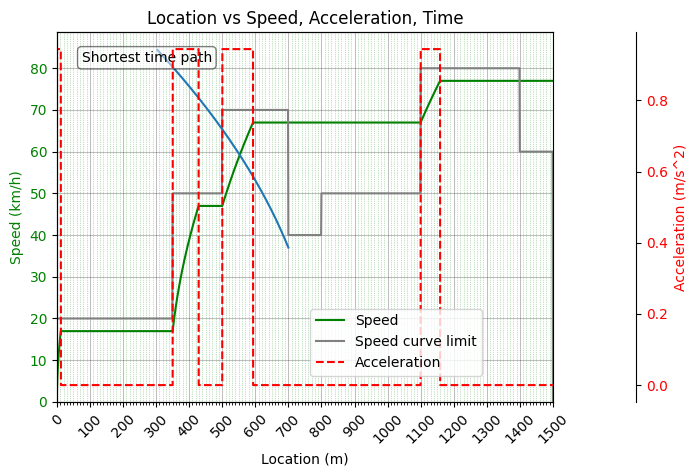

loop 2
intercept exist
Initiate forward trajectory...
Initiate Backward trajectory starting point coordinates: 1400
Intercept at x: 1238.3339459511865 and y: 20.780275099512522
Intercept quantity: 2
Brake check quantity: 3
Stop at iteration 15912
Regenerate curve...




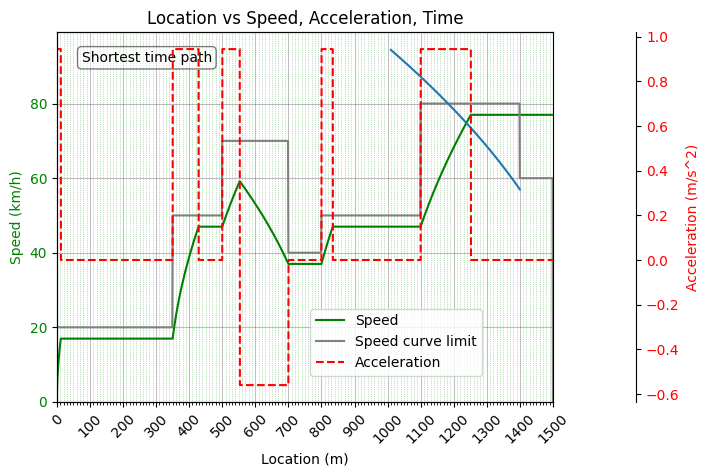

loop 3
intercept exist
Initiate forward trajectory...
Initiate Backward trajectory starting point coordinates: 1500
Intercept at x: 1192.5226027735398 and y: 18.58188878588476
Intercept quantity: 3
Brake check quantity: 3
Stop at iteration 16202
Regenerate curve...


INTERCEPT COORDINATES HAVE BEEN PROCESSED



In [42]:
###################################################
# IMPORT REQUIRED PLUGIN / LIBRARY
###################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from shapely.geometry import LineString

###################################################
# INITIALIZE
###################################################
T = 1000                              # total simulation time [seconds]
CONVERTER = 0.27778                   # -
VLIM_OPERATION = 3*CONVERTER          # operation limit [m/s]
dt = 0.01                             #
s_target = 1500                       # final destination [m]
N = int(T/dt)

# CAN BE EDITTED AND CUSTOMIZED
Vlimit = np.zeros(N)                  #Vlimit is function of distance
Vlimit[:350] = 20*CONVERTER           #convert to m/s
Vlimit[350:] = 50*CONVERTER
Vlimit[500:] = 70*CONVERTER
Vlimit[700:] = 40*CONVERTER
Vlimit[800:] = 50*CONVERTER
Vlimit[1100:] = 80*CONVERTER
Vlimit[1400:] = 60*CONVERTER
if s_target == False:
  Vlimit[-1] = 0
else:
  Vlimit[s_target:] = 0

print(f'[INITIALIZING]\n')

###################################################
# IDENTIFY INITIAL BACKWARD TRAJECTORY COORDINATE
###################################################
brake_check = []
# indentify points for backward trajectory
for i in range(len(Vlimit) - 1):
    current_value = Vlimit[i]
    next_value = Vlimit[i + 1]

    # Compare the current value with the next value
    if current_value > next_value:
        brake_check.append((i+1, next_value, current_value))

print(f'Set initial values...')
print(f'Identify backward tracjectory start coordinate...')
print(f'Plan to check bacward trajectory on coordinate(s): {brake_check}\n')

###################################################
# FIND FORWARD/BACKWARD TRAJECTORY INTERSECTION
###################################################
intercept = []
z = 1

print(f'[START] GENERATE TRAJECTORY\n')

#######################
# FORWARD TRAJECTORY
while z != len(intercept):
  print(f'loop {z}')

  if intercept:
    print('intercept exist')
  else:
    print('intercept not exist')

  # for j in range(len(brake_check)):
  backward_s_start = brake_check[z-1][0]
  backward_v_start = brake_check[z-1][1]
  backward_v_target = brake_check[z-1][2]
  print('Initiate forward trajectory...')
  N = int(T/dt)
  t = np.linspace(0,T,N)
  a = np.zeros(N)
  v = np.zeros(N)
  s = np.zeros(N)

  for i in range(1, N):
    # 1) ACCELERATION MODE
    acceleration()
    # 2) CRUISING MODE
    if v[i] > Vlimit[int(s[i])] - VLIM_OPERATION:          # FLAG
      cruising()
    # 3) BRAKING MODE
    if intercept:
      for index, value in enumerate(intercept):
        if intercept[index] <= s[i] < brake_check[index][0]:
          braking()
        elif s[i] >= brake_check[index][0]:
          acceleration()
          if v[i] > Vlimit[int(s[i])] - VLIM_OPERATION:
            cruising()
        elif s[i] >= s_target:
          break
    # 4) STOP
    if s[i] >= s_target or v[i] <= 0:
      a = a[:i]
      v = v[:i]
      s = s[:i]
      t = t[:i]
      break

  #######################
  # BACKWARD TRAJECTORY
  if len(intercept) < len(brake_check)+1: # FLAG
    print(f'Initiate Backward trajectory starting point coordinates: {backward_s_start}')
    a_b = np.zeros(N)
    v_b = np.zeros(N)
    s_b = np.zeros(N)
    v_b[0] = backward_v_start - VLIM_OPERATION ###FLAG
    s_b[0] = backward_s_start

    for i in range(1, N):
      braking_backward()
      if v_b[i] > backward_v_target + 4:
        a_b = a_b[:i]
        s_b = s_b[:i]
        v_b = v_b[:i]
        # INTERSECTION POINTS
        line_1 = LineString(np.column_stack((s, v)))
        line_2 = LineString(np.column_stack((s_b, v_b)))
        intersection = line_1.intersection(line_2)
        x, y = intersection.xy
        intercept.append(x[0])
        print(f'Intercept at x: {x[0]} and y: {y[0]}')
        break

  print(f'Intercept quantity: {len(intercept)}')
  print(f'Brake check quantity: {len(brake_check)}')
  print(f'Stop at iteration {len(t)}')
  print('Regenerate curve...')
  print('\n')

  #kapan harus berhenti
  if z == len(brake_check):
    break
  #update loop sequence
  z += 1
  plot_graph(time=False, legend=False)

print(f'INTERCEPT COORDINATES HAVE BEEN PROCESSED\n')

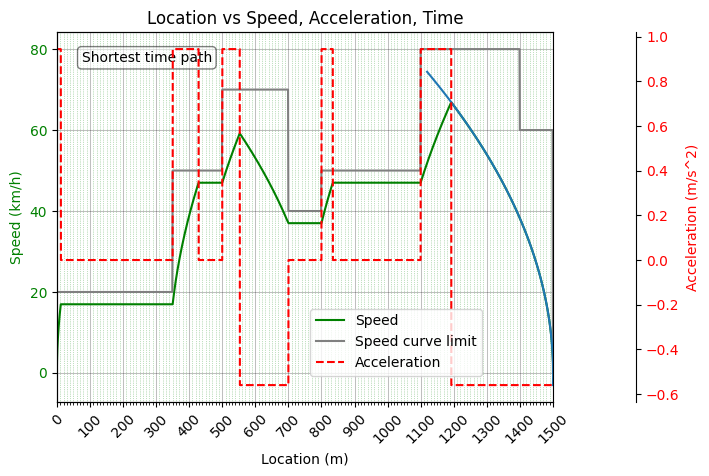

In [49]:
plot_graph(time=0)

In [43]:
brake_stop_list = []
processed_intercept_list, intercept_indices = process_list_with_indices(intercept)
brake_stop_list = [brake_check[i][0] for i in intercept_indices]

print("Processed intercept list:", processed_intercept_list)
print("Intercept indices:", intercept_indices)
print("Brake stop list:", brake_stop_list)

Processed intercept list: [552.9293074313939, 1192.5226027735398]
Intercept indices: [0, 2]
Brake stop list: [700, 1500]


Generate final curve...


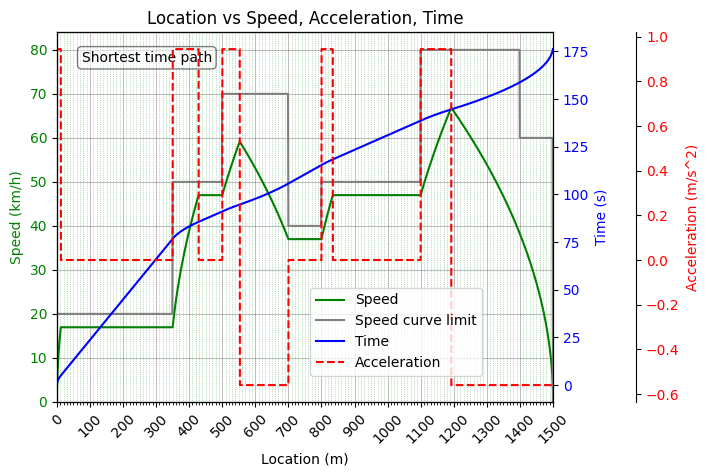

t termination at: 176.2 second (or) 2.9 minute


In [50]:
###################################################
# GENERATING FINAL CURVE
###################################################

N = int(T/dt)
t = np.linspace(0,T,N)
a = np.zeros(N)
v = np.zeros(N)
s = np.zeros(N)

print('Generate final curve...')
for i in range(1, N):
  # 1) ACCELERATION
  acceleration()
  # 2) CRUISING
  if v[i] > Vlimit[int(s[i])] - VLIM_OPERATION:
    cruising()
  # 3) BRAKING
  for j,k in zip(processed_intercept_list, brake_stop_list):
    if j <= s[i] < k:
      braking()
  # 4) STOP
  if s[i] >= s_target or v[i] <= 0:
    a = a[:i]
    v = v[:i]
    s = s[:i]
    t = t[:i]
    break

plot_graph(time=True, backward=False)
import matplotlib.animation as animation

print(f't termination at: {np.round(t[-1],1)} second (or) {np.round(t[-1]/60,1)} minute')